In [58]:
import pandas as pd
filename = 'hechos-de-transito-reportados-por-ssc-base-ampliada-no-comparativa.csv'
data = pd.read_csv(filename, header=0)

print(data.shape)
data.head(10)
data.columns
data=data
data=data[data['AÑO_EVENTO']==2019]
print(data.shape)

(35042, 61)
(18014, 61)


In [59]:
def condition(data,replacement,stringu):
    if data.empty:
        pass
    else:
        data[data['MARCA DE VEHÍCULO 1'].str.contains(stringu, na=False)]=replacement 
        data[data['MARCA DE VEHÍCULO 2'].str.contains(stringu, na=False)]=replacement    
        data[data['MARCA DE VEHÍCULO 3'].str.contains(stringu, na=False)]=replacement    
        data[data['MARCA DE VEHÍCULO 4'].str.contains(stringu, na=False)]=replacement
    return data
data=data[data['AÑO_EVENTO']==2019]
#clean chevrolet
#data['MARCA DE VEHÍCULO 1'].fillna('')
#data['MARCA DE VEHÍCULO 2'].fillna('')
#data['MARCA DE VEHÍCULO 3'].fillna('')
#data['MARCA DE VEHÍCULO 4'].fillna('')
data=condition(data,'AVEO','CHEVROLET AVEO')
data=condition(data,'BEAT','CHEVROLET BEAT')

#clean nissan
data=condition(data,'TSURU', 'NISSAN TSURU')
data=condition(data,'JETTA','VW JETTA')
data=condition(data,'JETTA','JETTA VW')
data=condition(data,'VENTO','VOLKSWAGEN VENTO')
data=condition(data,'CHEVY','CHEVROLET CHEVY')
data=condition(data,'CHEVY','CHEVY CHEVROLET')
data=condition(data,'SENTRA','NISSAN SENTRA')
data=condition(data,'SPARK','CHEVROLET SPARK')
data=condition(data,'MARCH','NISSAN MARCH')

In [4]:
data_automovil1=data[data['TIPO DE VEHÍCULO 1']=='AUTOMOVIL']
data_automovil2=data[data['TIPO DE VEHÍCULO 2']=='AUTOMOVIL']
data_automovil3=data[data['TIPO DE VEHÍCULO 3']=='AUTOMOVIL']
data_automovil4=data[data['TIPO DE VEHÍCULO 4']=='AUTOMOVIL']

In [5]:
array_marca1=data_automovil1['MARCA DE VEHÍCULO 1'].unique()
array_marca2=data_automovil2['MARCA DE VEHÍCULO 2'].unique()
array_marca3=data_automovil3['MARCA DE VEHÍCULO 3'].unique()
array_marca4=data_automovil4['MARCA DE VEHÍCULO 4'].unique()

In [6]:
countv1=data_automovil1.groupby('MARCA DE VEHÍCULO 1')['MARCA DE VEHÍCULO 1'].count().to_frame()
countv2=data_automovil2.groupby('MARCA DE VEHÍCULO 2')['MARCA DE VEHÍCULO 2'].count().to_frame()
countv3=data_automovil3.groupby('MARCA DE VEHÍCULO 3')['MARCA DE VEHÍCULO 3'].count().to_frame()
countv4=data_automovil4.groupby('MARCA DE VEHÍCULO 4')['MARCA DE VEHÍCULO 4'].count().to_frame()

In [7]:
Allcar=countv1.join(countv2).join(countv3).join(countv4)
Allcar=Allcar.fillna(0)
Allcar["Total"]=Allcar.iloc[:,0]+Allcar.iloc[:,1]+Allcar.iloc[:,2]+Allcar.iloc[:,3]
Allcar=Allcar.sort_values(by = 'Total',ascending=False) 
Allcar.head(30)
Allcar_clean=Allcar.copy()
Allcar_clean=Allcar_clean.head(40)
Allcar_clean

,MARCA DE VEHÍCULO 1,MARCA DE VEHÍCULO 2,MARCA DE VEHÍCULO 3,MARCA DE VEHÍCULO 4,Total
MARCA DE VEHÍCULO 1,,,,,
SD,1005,442.0,16.0,2.0,1465.0
AVEO,340,122.0,8.0,3.0,473.0
VERSA,331,124.0,13.0,2.0,470.0
JETTA,333,110.0,13.0,2.0,458.0
HONDA,270,76.0,13.0,1.0,360.0
VENTO,238,108.0,11.0,1.0,358.0
MAZDA,224,94.0,6.0,4.0,328.0
FORD,251,65.0,7.0,2.0,325.0
CHEVY,203,78.0,7.0,2.0,290.0


In [8]:
Allcar_clean=Allcar_clean.drop(['SD','HONDA','MAZDA','NISSAN','TOYOTA','FORD','CHEVROLET','IBIZA','RENAULT'])
Allcar_clean=Allcar_clean[:10]


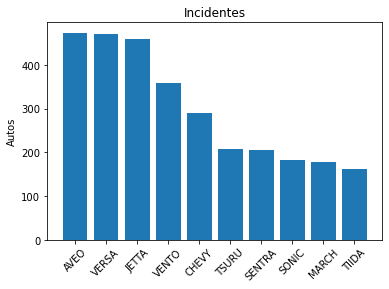

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Definimos una lista con paises como string
Autos = Allcar_clean.index.values
#Definimos una lista con ventas como entero
Incidentes = Allcar_clean.Total

fig, ax = plt.subplots()
ax.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Autos')
#Colocamos una etiqueta en el eje X
ax.set_title('Incidentes')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.xticks(rotation=45)
plt.bar(Autos, Incidentes)
plt.savefig('barras_simple.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()


In [10]:
list(Allcar_clean.index.values)

['AVEO',
 'VERSA',
 'JETTA',
 'VENTO',
 'CHEVY',
 'TSURU',
 'SENTRA',
 'SONIC',
 'MARCH',
 'TIIDA']

In [11]:
countv1=data_automovil1.groupby(['MARCA DE VEHÍCULO 1','CONDICIÓN'])['MARCA DE VEHÍCULO 1'].count().unstack()[['LESIONADO', 'OCCISO']]
countv2=data_automovil2.groupby(['MARCA DE VEHÍCULO 2','CONDICIÓN'])['MARCA DE VEHÍCULO 2'].count().unstack()[['LESIONADO', 'OCCISO']]
countv3=data_automovil3.groupby(['MARCA DE VEHÍCULO 3','CONDICIÓN'])['MARCA DE VEHÍCULO 3'].count().unstack()[['LESIONADO', 'OCCISO']]
countv4=data_automovil4.groupby(['MARCA DE VEHÍCULO 4','CONDICIÓN'])['MARCA DE VEHÍCULO 4'].count().unstack()[['LESIONADO', 'OCCISO']]
countv1=countv1.fillna(0)
countv2=countv2.fillna(0)
countv3=countv3.fillna(0)
countv4=countv4.fillna(0)
countv1= countv1.rename(columns={'LESIONADO': 'LESIONADO1','OCCISO':'OCCISO1'})
countv2= countv2.rename(columns={'LESIONADO': 'LESIONADO2','OCCISO':'OCCISO2'})
countv3= countv3.rename(columns={'LESIONADO': 'LESIONADO3','OCCISO':'OCCISO3'})
countv4= countv4.rename(columns={'LESIONADO': 'LESIONADO4','OCCISO':'OCCISO4'})

In [12]:
Allcar=countv1.join(countv2).join(countv3).join(countv4)
Allcar=Allcar.fillna(0)
Allcar['TotLesionado']=Allcar['LESIONADO1']+Allcar['LESIONADO2']+Allcar['LESIONADO3']+Allcar['LESIONADO4']
Allcar['TotOcciso']=Allcar['OCCISO1']+Allcar['OCCISO2']+Allcar['OCCISO3']+Allcar['OCCISO4']
Allcar['Total']=Allcar['TotLesionado']+Allcar['TotOcciso']
Allcar=Allcar.sort_values(by = 'TotLesionado',ascending=False) 
Allcar=Allcar.sort_values(by = 'Total',ascending=False) 
Allcar_clean=Allcar.copy()
Allcar_clean=Allcar_clean.drop(['SD','HONDA','MAZDA','NISSAN','TOYOTA','FORD','CHEVROLET','IBIZA','RENAULT'])
Allcar_clean=Allcar_clean[:10]
Allcar_clean

CONDICIÓN,LESIONADO1,OCCISO1,LESIONADO2,OCCISO2,LESIONADO3,OCCISO3,LESIONADO4,OCCISO4,TotLesionado,TotOcciso,Total
MARCA DE VEHÍCULO 1,,,,,,,,,,,
AVEO,334.0,6.0,121.0,1.0,8.0,0.0,3.0,0.0,466.0,7.0,473.0
VERSA,328.0,3.0,122.0,2.0,12.0,1.0,2.0,0.0,464.0,6.0,470.0
JETTA,329.0,4.0,110.0,0.0,12.0,1.0,2.0,0.0,453.0,5.0,458.0
VENTO,237.0,1.0,106.0,2.0,11.0,0.0,1.0,0.0,355.0,3.0,358.0
CHEVY,202.0,1.0,78.0,0.0,5.0,2.0,2.0,0.0,287.0,3.0,290.0
TSURU,141.0,4.0,54.0,1.0,7.0,0.0,1.0,0.0,203.0,5.0,208.0
SENTRA,143.0,1.0,55.0,1.0,2.0,0.0,3.0,0.0,203.0,2.0,205.0
SONIC,130.0,2.0,42.0,0.0,8.0,0.0,1.0,0.0,181.0,2.0,183.0
MARCH,118.0,0.0,52.0,1.0,7.0,0.0,1.0,0.0,178.0,1.0,179.0


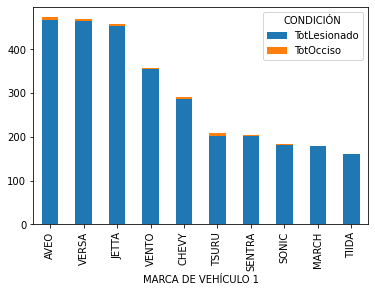

In [13]:
Allcar_clean[['TotLesionado','TotOcciso']].plot(kind='bar', stacked=True)

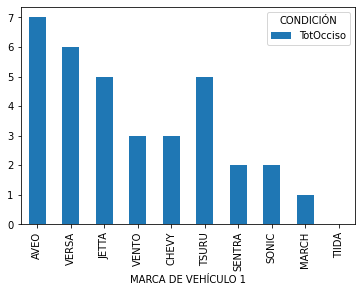

In [14]:
Allcar_clean[['TotOcciso']].plot(kind='bar', stacked=True)

In [15]:
Allcar_clean['dead']=Allcar_clean['TotOcciso']/Allcar_clean['TotLesionado']*100

In [16]:

mylist=[5,3,3,5,0,0,-1,0,0,-1]
Allcar_clean["Stars"]=mylist
Allcar_clean

CONDICIÓN,LESIONADO1,OCCISO1,LESIONADO2,OCCISO2,LESIONADO3,OCCISO3,LESIONADO4,OCCISO4,TotLesionado,TotOcciso,Total,dead,Stars
MARCA DE VEHÍCULO 1,,,,,,,,,,,,,
AVEO,334.0,6.0,121.0,1.0,8.0,0.0,3.0,0.0,466.0,7.0,473.0,1.502146,5
VERSA,328.0,3.0,122.0,2.0,12.0,1.0,2.0,0.0,464.0,6.0,470.0,1.293103,3
JETTA,329.0,4.0,110.0,0.0,12.0,1.0,2.0,0.0,453.0,5.0,458.0,1.103753,3
VENTO,237.0,1.0,106.0,2.0,11.0,0.0,1.0,0.0,355.0,3.0,358.0,0.845070,5
CHEVY,202.0,1.0,78.0,0.0,5.0,2.0,2.0,0.0,287.0,3.0,290.0,1.045296,0
TSURU,141.0,4.0,54.0,1.0,7.0,0.0,1.0,0.0,203.0,5.0,208.0,2.463054,0
SENTRA,143.0,1.0,55.0,1.0,2.0,0.0,3.0,0.0,203.0,2.0,205.0,0.985222,-1
SONIC,130.0,2.0,42.0,0.0,8.0,0.0,1.0,0.0,181.0,2.0,183.0,1.104972,0
MARCH,118.0,0.0,52.0,1.0,7.0,0.0,1.0,0.0,178.0,1.0,179.0,0.561798,0


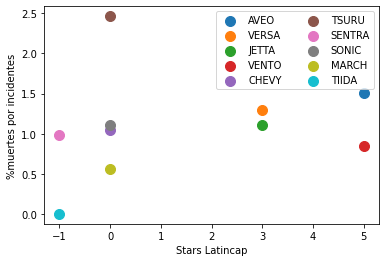

In [17]:
y=Allcar_clean['Stars']
x=Allcar_clean['dead']
index=Allcar_clean.index.values
Allcar_clean.index.name='TREND'
i=0
for ticker,row in Allcar_clean.iterrows():
    plt.scatter(row['Stars'], row['dead'], label=index[i], s=100)
    i=i+1
plt.legend(loc="upper right",ncol= 2)
plt.ylabel('%muertes por incidentes')
plt.xlabel('Stars Latincap')
plt.show()

In [18]:
import pandas as pd
filename = 'hechos-de-transito-reportados-por-ssc-base-ampliada-no-comparativa.csv'
data = pd.read_csv(filename, header=0)

print(data.shape)
data.head(10)
data.columns
data=data[(data['CONDICIÓN']=='OCCISO')&(data['TIPO DE EVENTO']=='DERRAPADO')&((data['TIPO DE VEHÍCULO 1']=='MOTOCICLETA')|(data['TIPO DE VEHÍCULO 2']=='MOTOCICLETA')|(data['TIPO DE VEHÍCULO 3']=='MOTOCICLETA')|(data['TIPO DE VEHÍCULO 4']=='MOTOCICLETA'))]

(35042, 61)


In [19]:
data.shape
data_heat=data.copy()

In [20]:
data_heat['COORDENADA Y'] = data['COORDENADA Y'].astype(float)
data_heat['COORDENADA X'] = data['COORDENADA X'].astype(float)

In [12]:
import folium
import csv
from folium.plugins import HeatMap

In [21]:


heatmap_map = folium.Map(location=[19.4326, -99.12766], zoom_start=20)

heat_df = data_heat.dropna(axis=0, subset=['COORDENADA Y','COORDENADA X'])
heat_data = [[row['COORDENADA Y'],row['COORDENADA X']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(heatmap_map)

In [303]:
heatmap_map

In [2]:
data.dtypes
data['FECHA EVENTO'] =  pd.to_datetime(data['FECHA EVENTO'], format='%Y-%m-%d')


       
data['HORA_EVENTO']=data['HORA_EVENTO'].replace({'a. m.':'AM','p. m.':'PM'}, regex=True)



In [3]:
formato = lambda x: '%I:%M:%S %p' if (x.str.contains('a. m.') or x.str.contains('p.m.')) else '%H:%M'

hour1 = pd.to_datetime(data['HORA_EVENTO'], errors='coerce', format='%I:%M:%S %p')
hour2 = pd.to_datetime(data['HORA_EVENTO'], errors='coerce', format='%H:%M')
data['HORA_EVENTO'] = hour1.fillna(hour2)


In [31]:
#accidents per mont
#data2019
data=data[data['AÑO_EVENTO']==2019]
data=data[data['CONDICIÓN']=='OCCISO']

In [5]:
#accidents per mont
data_month=data.groupby(data['FECHA EVENTO'].dt.month).count()['FECHA EVENTO']

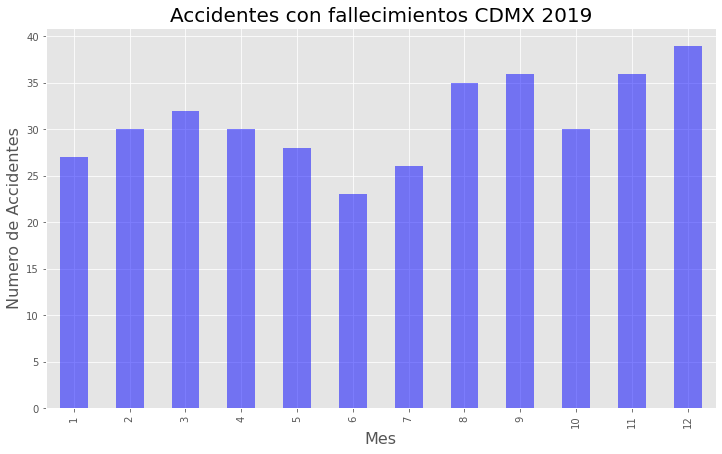

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

data_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidentes con fallecimientos CDMX 2019', fontsize=20)
plt.xlabel('Mes',fontsize=16)
plt.ylabel('Numero de Accidentes',fontsize=16);

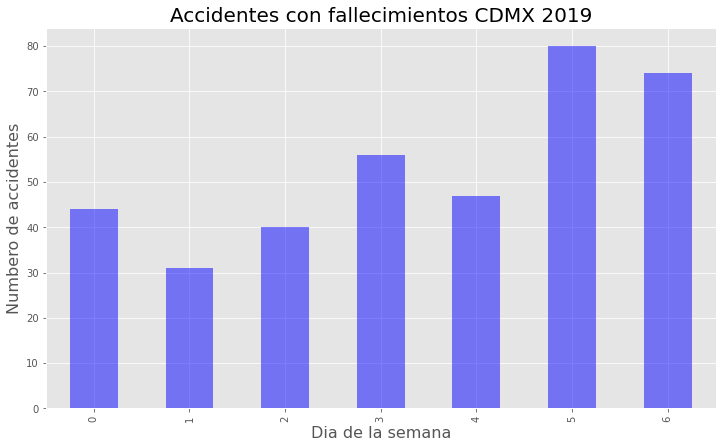

In [7]:
# Number of accident per day of the week
data_day = data.groupby(data['FECHA EVENTO'].dt.dayofweek).count()['FECHA EVENTO']



# plot accidents per day
data_day.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidentes con fallecimientos CDMX 2019', fontsize=20)
plt.xlabel('Dia de la semana',fontsize=16)
plt.ylabel('Numbero de accidentes',fontsize=16);

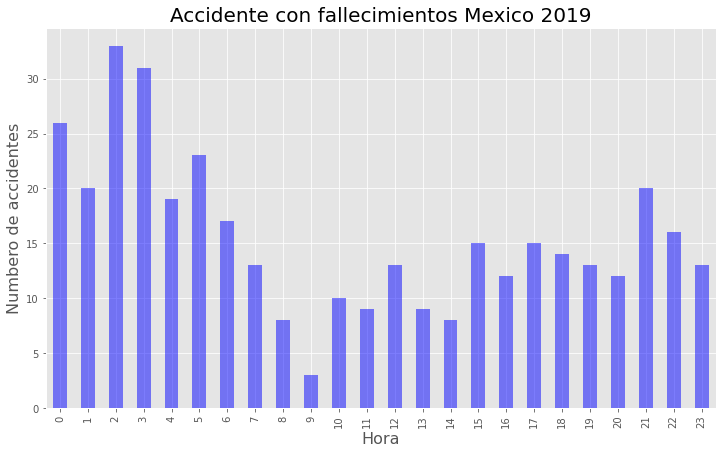

In [8]:
# Number of accident per hour
accidents_hour = data.groupby(data['HORA_EVENTO'].dt.hour).count()['HORA_EVENTO']

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidente con fallecimientos Mexico 2019', fontsize=20)
plt.xlabel('Hora',fontsize=16)
plt.ylabel('Numbero de accidentes',fontsize=16);

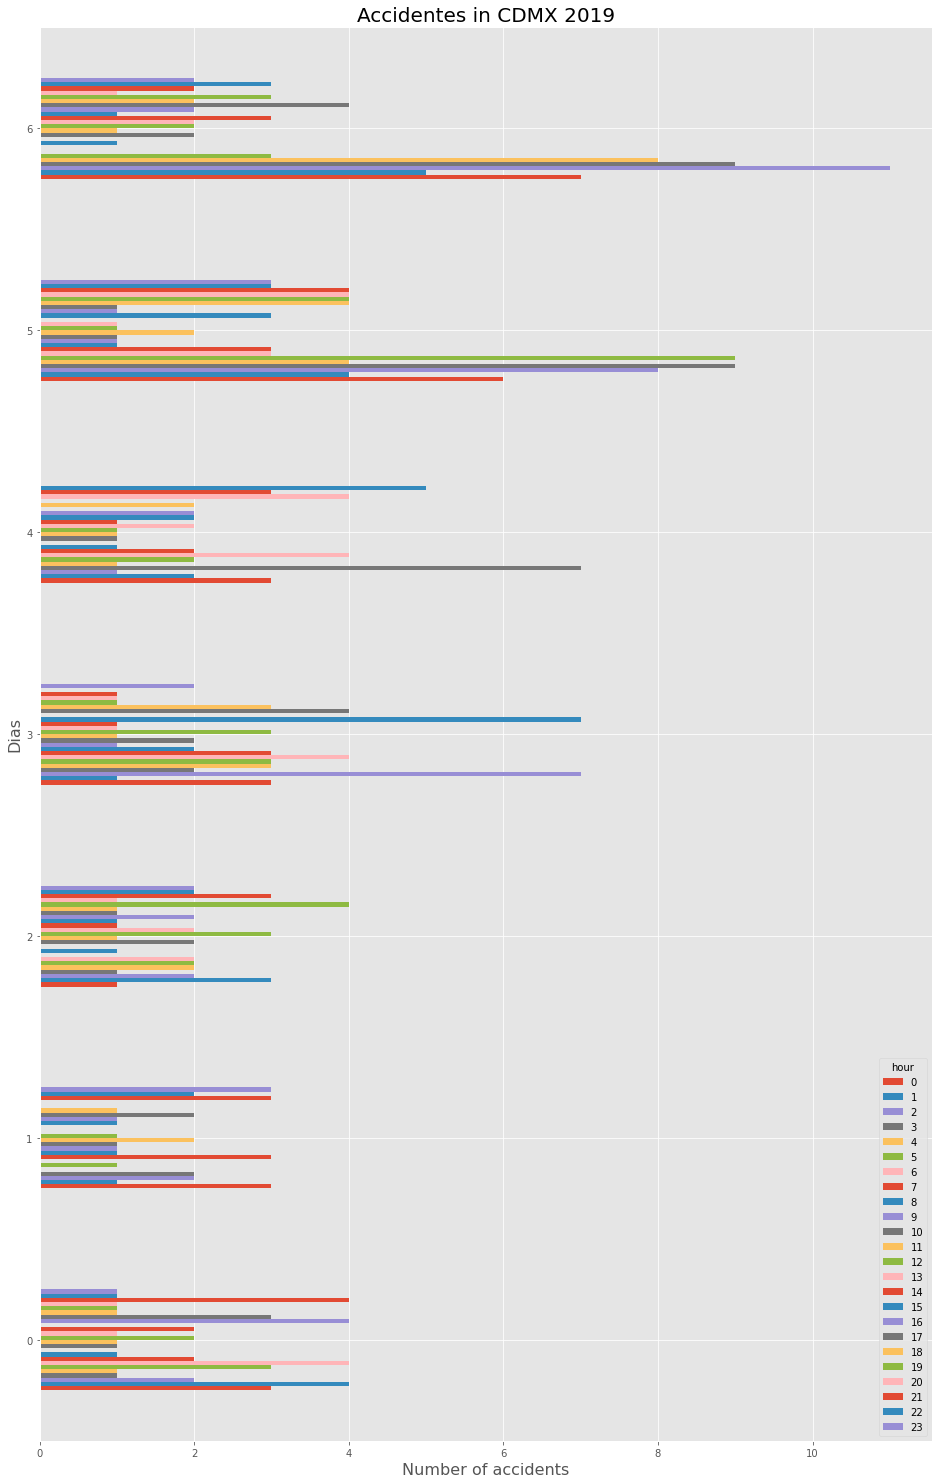

In [9]:
# Number of accident per hour and day
accidents_hour_day = data.groupby([data['FECHA EVENTO'].dt.dayofweek.rename('day'),data['HORA_EVENTO'].dt.hour.rename('hour')]).count()['HORA_EVENTO']

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
#plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidentes in CDMX 2019',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Dias',fontsize=16);

Text(0, 0.5, '')

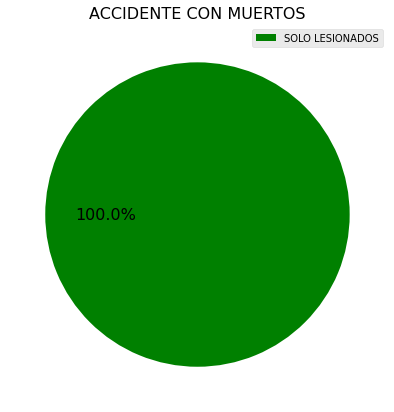

In [20]:
# Serie with number of mild injuries and serious injuries
injuries = data.groupby('CONDICIÓN')['CONDICIÓN'].count()
injuries
# Pie plot with the percentage of victims with mild and serious injuries
injuries.plot(kind='pie',figsize=(7,7), colors=['green','red'], labels=None, autopct='%1.1f%%', fontsize=16)

# Legend and title
plt.legend(labels=['SOLO LESIONADOS', 'MUERTOS'])
plt.title('ACCIDENTE CON MUERTOS', fontsize=16)
plt.ylabel('')

In [22]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
CDMX_map= folium.Map(location=[19.4326, -99.12766], zoom_start=12)
data=data[data['CONDICIÓN']=='OCCISO']
# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(data['COORDENADA Y'].astype(float),data['COORDENADA X'].astype(float),data['HORA_EVENTO'].dt.hour):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(CDMX_map)

CDMX_map

In [54]:
hk_geo = r'cuadrantes.geojson'
data3=data.groupby('ALCALDÍA')['ALCALDÍA'].count().to_frame()
data3 = data.groupby('ALCALDÍA').count().reset_index()
data3['alcaldia']=data3['ALCALDÍA']
data3

,ALCALDÍA,No. FOLIO,FECHA EVENTO,AÑO_EVENTO,MES_EVENTO,HORA_EVENTO,CONDICIÓN,TIPO DE EVENTO,COORDENADA X,COORDENADA Y,...,UNIDAD MEDICA DE APOYO,LUGAR DEL DECESO,TRASLADADO(S) LESIONADO,HOSPITAL,DIA_EVENTO,HORA2,PRIORIDAD,OBSERVACIONES,coordenada,alcaldia
0,ALVARO OBREGON,32,32,32,32,32,32,32,32,32,...,32,32,32,4,32,32,32,5,32,ALVARO OBREGON
1,AZCAPOTZALCO,24,24,24,24,24,24,24,24,24,...,24,24,24,4,24,24,24,10,24,AZCAPOTZALCO
2,BENITO JUAREZ,15,15,15,15,15,15,15,15,15,...,15,15,15,5,15,15,15,6,15,BENITO JUAREZ
3,COYOACAN,27,27,27,27,27,27,27,27,27,...,27,27,27,3,27,27,27,5,27,COYOACAN
4,CUAJIMALPA,6,6,6,6,6,6,6,6,6,...,6,6,6,1,6,6,6,2,6,CUAJIMALPA
5,CUAUHTEMOC,32,32,32,32,32,32,32,32,32,...,32,32,32,2,32,32,32,11,32,CUAUHTEMOC
6,GUSTAVO A MADERO,43,43,43,43,43,43,43,43,43,...,43,43,43,4,43,43,43,15,43,GUSTAVO A MADERO
7,IZTACALCO,16,16,16,16,16,16,16,16,16,...,16,16,16,3,16,16,16,3,16,IZTACALCO
8,IZTAPALAPA,55,55,55,55,55,55,55,55,55,...,55,55,55,6,55,55,55,19,55,IZTAPALAPA
9,MAGDALENA CONTRERAS,4,4,4,4,4,4,4,4,4,...,4,4,4,2,4,4,4,1,4,MAGDALENA CONTRERAS


In [56]:

map1 = folium.Map(location=[19.4326, -99.12766], tiles='cartodbpositron', zoom_start=12)
#tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
#for tile in tiles:
    #folium.TileLayer(tile).add_to(map1)
    

map1.choropleth(
    geo_data=hk_geo,
    data=data3,
    columns=['alcaldia', 'AÑO_EVENTO'],
    key_on='feature.properties.alcaldia',
    fill_color='BuPu', 
    fill_opacity=1, 
    line_opacity=1,
    legend_name='Accidentes con fallecidos Ciudad de mexico 2019',
    smooth_factor=0)

map1